<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Image-Histogram/Image_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image.[1] It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

Image histograms are present on many modern digital cameras. Photographers can use them as an aid to show the distribution of tones captured, and whether image detail has been lost to blown-out highlights or blacked-out shadows.[2] This is less useful when using a raw image format, as the dynamic range of the displayed image may only be an approximation to that in the raw file.[citation needed]

The horizontal axis of the graph represents the tonal variations, while the vertical axis represents the total number of pixels in that particular tone.[1]

The left side of the horizontal axis represents the dark areas, the middle represents mid-tone values and the right hand side represents light areas. The vertical axis represents the size of the area (total number of pixels) that is captured in each one of these zones.

Thus, the histogram for a very dark image will have most of its data points on the left side and center of the graph.

Conversely, the histogram for a very bright image with few dark areas and/or shadows will have most of its data points on the right side and center of the graph.

<img src="https://chartio.com/assets/8609d7/tutorials/charts/histograms/64918b209c6e60b56bee9d8c7ba22dcd854370078e6b8377f272c85119080728/histogram-example-2.png" >

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def logkernel(sigma,kernel_size):
    center_px=int(((kernel_size-1)/2))
    log_kernel=np.empty([kernel_size,kernel_size])
    for i in range(kernel_size):
        for j in range(kernel_size):
            x=i-center_px
            y=j-center_px
            log_kernel[i][j] = ((-1.0)/(math.pi*(sigma**4)))*(1-((x**2+y**2)/(2*sigma**2)))*math.exp(-1*((x**2+y**2)/(2*sigma**2)))
    return log_kernel

In [3]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-18 19:02:13--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 184.24.40.200, 2600:1402:3800:2a6::1931, 2600:1402:3800:294::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|184.24.40.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.03s   

2020-12-18 19:02:13 (4.11 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [4]:
img = cv.imread('AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
y = np.zeros(256)
row, col = img.shape
for i in range(0,row):
    for j in range(0,col):
        y[img[i,j]] += 1

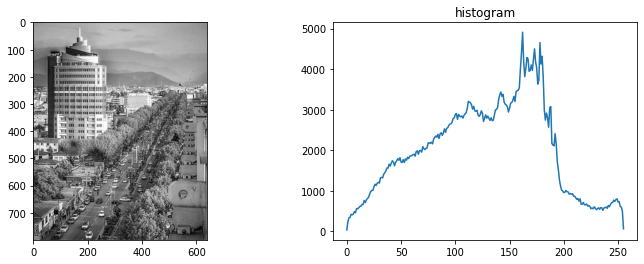

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
plt.title("histogram")
ax1.imshow(img, cmap='gray')
ax2.plot(y)
plt.show()